In [1]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../../..')
from dimer_model_fit import EnergiesConfidenceIntervalPaired
%matplotlib widget

if not os.path.exists('Figs'):
    os.mkdir('Figs')

### Import data

In [2]:
df_main = pd.read_csv("df_main.csv")
df_s1 = pd.read_csv("df_s1.csv")
df_s2 = pd.read_csv("df_s2.csv")

# Association constants expressed in log10 form
Ka_wt = 6.446  # <- AUC measurement
Ka_mut = 6.446  # <- initial guess
Km = 2.5  # <- initial guass

### Analysis with shared Km

In [3]:
analysis1 = EnergiesConfidenceIntervalPaired(df_main, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis2 = EnergiesConfidenceIntervalPaired(df_s1, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis3 = EnergiesConfidenceIntervalPaired(df_s2, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis4 = EnergiesConfidenceIntervalPaired(df_main, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=False, 
                                            fix_mut=False, fit_D=False)
analysis5 = EnergiesConfidenceIntervalPaired(df_s1, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=False, 
                                            fix_mut=False, fit_D=False)
analysis6 = EnergiesConfidenceIntervalPaired(df_s2, log=True, p0=(Ka_wt, Ka_mut, Km), fix_wt=False, 
                                            fix_mut=False, fit_D=False)

### Analysis with unshared Km

In [4]:
# df_main_wt = df_main[df_main.Line.isin(['lp637', 'nwg201'])]
# df_main_mut = df_main[df_main.Line.isin(['nwg338', 'nwg369'])]
# df_s1_wt = df_s1[df_s1.Line.isin(['lp637', 'nwg201'])]
# df_s1_mut = df_s1[df_s1.Line.isin(['nwg338', 'nwg369'])]
# df_s2_wt = df_s2[df_s2.Line.isin(['lp637', 'nwg201'])]
# df_s2_mut = df_s2[df_s2.Line.isin(['nwg338', 'nwg369'])]

# analysis7 = [EnergiesConfidenceIntervalUnpaired(df_main_wt, log=True, fix_ka=True, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_main_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis8 = [EnergiesConfidenceIntervalUnpaired(df_s1_wt, log=True, fix_ka=True, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s1_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis9 = [EnergiesConfidenceIntervalUnpaired(df_s2_wt, log=True, fix_ka=True, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s2_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]

# analysis10 = [EnergiesConfidenceIntervalUnpaired(df_main_wt, log=True, fix_ka=False, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_main_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis11 = [EnergiesConfidenceIntervalUnpaired(df_s1_wt, log=True, fix_ka=False, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s1_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]
# analysis12 = [EnergiesConfidenceIntervalUnpaired(df_s2_wt, log=True, fix_ka=False, p0=(Ka_wt, Km)),
#              EnergiesConfidenceIntervalUnpaired(df_s2_mut, log=True, fix_ka=False, p0=(Ka_mut, Km))]

### Table

In [8]:
def create_row(analysis, D, figure):
    # Extract data
    fix_wt = analysis.fix_wt
    ka_full_wt = analysis.ka_full[0]
    ka_full_L109R = analysis.ka_full[1]
    kas_wt = analysis.kas[0]
    kas_L109R = analysis.kas[1]
    ka_full_fold = 10 ** (ka_full_wt - ka_full_L109R)
    kas_fold = 10 ** (kas_wt - kas_L109R)
    km_full = analysis.km_full
    kms = analysis.kms

    # D
    row = {"a (nm)": str(D)}

    # ka wt fixed?
    if fix_wt:
        row[r"$K\mathrm{_D^{dim}}$" + " WT fixed?"] = "✓"
    else:
        row[r"$K\mathrm{_D^{dim}}$" + " WT fixed?"] = "x"

    # kD_dim wt
    a = 10 ** (-ka_full_wt + 6)
    [low, high] = 10 ** (np.percentile(-kas_wt + 6, [2.5, 97.5]))
    if not fix_wt:
        row[r"$K\mathrm{_D^{dim}}$" + " WT (µM)"] = f"{a:.3f} [{low:.3f}, {high:.3f}]"
    else:
        row[r"$K\mathrm{_D^{dim}}$" + " WT (µM)"] = f"{a:.3f}"

    # kD_dim mut
    a = 10 ** (-ka_full_L109R + 6)
    [low, high] = 10 ** (np.percentile(-kas_L109R + 6, [2.5, 97.5]))
    row[r"$K\mathrm{_D^{dim}}$" + " L109R (µM)"] = f"{a:.3f} [{low:.3f}, {high:.3f}]"

    # kD fold
    a = ka_full_fold
    [low, high] = np.percentile(kas_fold, [2.5, 97.5])
    row[
        r"$K\mathrm{_D^{dim}}$" + " fold difference"
    ] = f"{a:.2f} [{low:.2f}, {high:.2f}]"

    # kD_mem
    a = -km_full
    print(a)
    [low, high] = np.percentile(-kms, [2.5, 97.5])
    row[r"$\log_{10}(K\mathrm{_D^{mem}})$"] = f"{a:.2f} [{low:.2f}, {high:.2f}]"

    # Figure
    row["Figure"] = figure

    return row

In [9]:
res = pd.DataFrame()
res = res.append(create_row(analysis4, 5, "3F"), ignore_index=True)
res = res.append(create_row(analysis5, 0.5, "S6B"), ignore_index=True)
res = res.append(create_row(analysis6, 50, "S6C"), ignore_index=True)
res = res.append(create_row(analysis1, 5, "S6D"), ignore_index=True)
res = res.append(create_row(analysis2, 0.5, "S6E"), ignore_index=True)
res = res.append(create_row(analysis3, 50, "S6F"), ignore_index=True)

# res

-2.4269531762774603
-3.3805819026226707
-1.6238131926555566
-2.3946427028334076
-2.9144470276311543
-1.8321451953761958


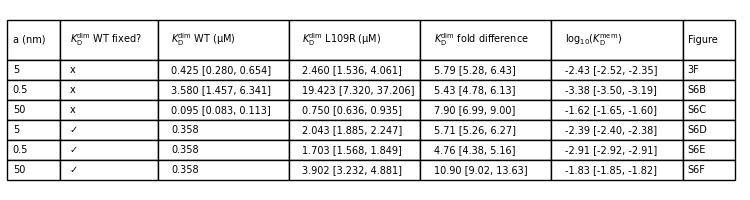

In [10]:
def plot_table(results):
    fig, ax = plt.subplots()
    fontsize = 7
    cell_text = []
    for row in range(len(results)):
        cell_text.append(results.iloc[row])
    widths = np.array([0.08, 0.15, 0.2, 0.2, 0.2, 0.2, 0.08])
    tab = ax.table(
        cellText=cell_text,
        colLabels=results.columns,
        loc="center",
        colWidths=widths / sum(widths),
        cellLoc="left",
        colLoc="left",
    )
    tab.auto_set_font_size(False)
    cellDict = tab.get_celld()
    for i in range(0, len(results.columns)):
        cellDict[(0, i)].set_height(0.2)
        for j in range(1, len(cell_text) + 1):
            cellDict[(j, i)].set_height(0.1)
    tab.set_fontsize(fontsize)
    ax.axis("off")
    fig.set_size_inches(7.5, 2)
    fig.subplots_adjust(left=0.01, right=0.98, bottom=0, top=1)
    return fig


fig = plot_table(res)
fig.savefig("Figs/parameters.png", dpi=600, transparent=True)